In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as s
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
#loading excel dataset to pandas dataframe
file = '/Users/ceyhunsahinkaya/Desktop/Data Science Projects/IWCO Case Study/Visualization Data.xlsx'
df = pd.read_excel(file, 'Data')
pd.set_option('display.max_columns', None)



In [3]:
df.head(5)

,Response_Flag,County FIPS,State FIPS,IBE8609,IBE8652,IBE8629,IBE8628,IBE2351,IBE8692,IBE8680,IBE8619,IBE2356,IBE7602_01,IBE8603_01,IBE8603_02,IBE8603_03,IBE8603_04,IBE8603_05,IBE8603_06,IBE8603_07,IBE8603_08,IBE8603_09,IBE8603_10,IBE8603_11,IBE8603_12,IBE8603_13,IBE8603_14,IBE8603_15,IBE8603_16,IBE8603_17,IBE8603_18,IBE8603_19,IBE8671,IBE8616,IBE9509,IBE8604,IBE7832,IBE7827,IBE7823,IBE7822,IBE7824,IBE7841,IBE7726,IBE7724,IBE7844,IBE7809,IBE7727,IBE8082,IBE7821,IBE7732,IBE7848,IBE7735,IBE7779,IBE7777,IBE7780,IBE7740,IBE7743,IBE7849,IBE7720,IBE2203,IBE7753,IBE7851,IBE7757,IBE7764,IBE7763,IBE7805,IBE7803,IBE7773,IBE7774,IBE7775,IBE7754,IBE7758,IBE7808,IBE7802,IBE7811,IBE7804,IBE7756,IBE6139,IBE2022,IBE6556,AP011282,IBE6142,IBE6199,IBE6200,IBE6313,IBE6380,IBE6456,IBE6331,IBE6793,IBE6425,IBE6579,IBE9153_01,IBE9153_02,IBE9153_03,IBE9153_04,IBE9153_05,IBE9153_06,IBE9153_07,IBE9153_08,IBE9153_09,IBE9153_10,IBE9153_11,IBE9153_12,IBE9153_13,IBE9153_14,IBE9153_15,IBE9153_16,IBE9153_17,IBE9153_18,IBE9153_19,IBE9153_20,IBE9153_21,IBE8647,IBE8165_01,IBE8165_02,IBE8165_03,IBE8581,IBE8439,IBE8441,IBE8642,IBE8606,IBE7607_01,IBE8663
0,0,73,6,S,2,2,1,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,62,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,E,J,O,9,NaN
1,0,37,6,S,3,5,4,1.0,Y,NaN,Y,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,34,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,A,B,F,Q,O,15,NaN
2,0,37,6,S,1,2,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,72,1.0,Z,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,M,O,0,NaN
3,0,65,6,S,2,3,2,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,70,2.0,W,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B,G,Q,O,14,F
4,0,47,6,S,3,2,4,1.0,Y,NaN,Y,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,32,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,67.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,A,B,C,M,O,15,NaN


# EXPLORATORY DATA ANALYSIS (EDA)

In this section, we will look at the datasets closely. We will check if the datasets are missing any values. We will check if there are anomalies, clear outliers and format the dataset for visualization and model building. 

In [4]:
#exploring the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Columns: 123 entries, Response_Flag to IBE8663
dtypes: float64(102), int64(9), object(12)
memory usage: 14.1+ MB


,Response_Flag,County FIPS,State FIPS,IBE8652,IBE8629,IBE8628,IBE2351,IBE2356,IBE7602_01,IBE8603_01,IBE8603_02,IBE8603_03,IBE8603_04,IBE8603_05,IBE8603_06,IBE8603_07,IBE8603_08,IBE8603_09,IBE8603_10,IBE8603_11,IBE8603_12,IBE8603_13,IBE8603_14,IBE8603_15,IBE8603_16,IBE8603_17,IBE8603_18,IBE8603_19,IBE8616,IBE9509,IBE7832,IBE7827,IBE7823,IBE7822,IBE7824,IBE7841,IBE7726,IBE7724,IBE7844,IBE7809,IBE7727,IBE8082,IBE7821,IBE7732,IBE7848,IBE7735,IBE7779,IBE7777,IBE7780,IBE7740,IBE7743,IBE7849,IBE7720,IBE2203,IBE7753,IBE7851,IBE7757,IBE7764,IBE7763,IBE7805,IBE7803,IBE7773,IBE7774,IBE7775,IBE7754,IBE7758,IBE7808,IBE7802,IBE7811,IBE7804,IBE7756,IBE6139,IBE2022,IBE6556,AP011282,IBE6142,IBE6199,IBE6200,IBE6313,IBE6380,IBE6456,IBE6331,IBE6793,IBE6425,IBE6579,IBE9153_01,IBE9153_02,IBE9153_03,IBE9153_04,IBE9153_05,IBE9153_06,IBE9153_07,IBE9153_08,IBE9153_09,IBE9153_10,IBE9153_11,IBE9153_12,IBE9153_13,IBE9153_14,IBE9153_15,IBE9153_16,IBE9153_17,IBE9153_18,IBE9153_19,IBE9153_20,IBE9153_21,IBE8647,IBE8165_01,IBE8165_02,IBE8165_03,IBE7607_01
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,2150.0,2435.0,14994.000000,12.0,25.0,77.0,75.0,98.0,95.0,108.0,140.0,117.0,146.0,169.0,145.0,98.0,62.0,96.0,75.0,135.0,140.0,0.0,14994.000000,12769.000000,10117.0,13123.0,10947.0,11768.0,12394.0,5122.0,6779.0,8202.0,5075.0,3010.0,4617.0,2088.0,8436.0,4772.0,7056.0,4473.0,8427.0,8977.0,3564.0,10324.0,5075.0,6289.0,11032.0,3213.0,10217.0,6440.0,4102.0,5196.0,8582.0,2862.0,4106.0,3820.0,5811.0,6959.0,4404.0,3643.0,1997.0,4225.0,5430.0,5559.0,7758.0,1958.0,7831.0,4084.0,14959.000000,3854.0,4084.0,6094.0,2676.0,3321.0,2844.0,4716.0,3655.0,5938.0,2591.0,1896.0,0.0,5837.0,9127.0,11759.0,2591.0,6586.0,7635.0,4322.0,120.0,2676.0,4245.0,8288.0,6602.0,9389.0,10029.0,3774.0,316.0,1167.0,0.0,1219.0,8820.000000,6124.0,722.0,2302.0,14994.000000
mean,0.034414,87.926971,19.769574,1.733693,2.716820,2.270308,1.0,1.0,0.430572,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,61.332533,1.648837,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.754997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,2.074717,1.0,1.0,1.0,12.248566
std,0.182296,98.556680,18.216465,0.705744,1.443658,1.244248,0.0,0.0,0.734756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.015961,0.747981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.499020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.881051,0.0,0.0,0.0,4.546789
min,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,24.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.000000,1.0,1.0,1.0,0.000000
25%,0.000000,37.000000,6.000000,1.000000,2.000000,1.000000,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,52.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.000000,1.0,1.0,1.0,11.000000
50%,0.000000,65.000000,12.000000,2.000000,2.000000,2.000000,1.0,1.0,0.000000,1.0,1.0,1.0,1.

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 123 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Response_Flag  14994 non-null  int64  
 1    County FIPS    14994 non-null  int64  
 2    State FIPS     14994 non-null  int64  
 3    IBE8609        14968 non-null  object 
 4    IBE8652        14994 non-null  int64  
 5    IBE8629        14994 non-null  int64  
 6    IBE8628        14994 non-null  int64  
 7    IBE2351        2150 non-null   float64
 8    IBE8692        5523 non-null   object 
 9    IBE8680        1028 non-null   object 
 10   IBE8619        8153 non-null   object 
 11   IBE2356        2435 non-null   float64
 12   IBE7602_01     14994 non-null  int64  
 13   IBE8603_01     12 non-null     float64
 14   IBE8603_02     25 non-null     float64
 15   IBE8603_03     77 non-null     float64
 16   IBE8603_04     75 non-null     float64
 17   IBE8603_05     98 non-null   

It seem like alot of columns have too many missing values, therefore we will drop of those columns. If a column is missing more than 60% of its values, we will drop it.

__Suggestion:__ We can deal with missing values by the columns' dtypes instead of dropping them. For example, we can check numerical columns and trying replace missing values with either mean of the all column or we can use ffill or bfill method.

In [6]:
drop_float = df.loc[:,df.isnull().mean() > 0.6]
drop1 = drop_float.columns

df1 = df.drop(drop1, axis =1)

In [7]:
df1.shape

(14994, 52)

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 123 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Response_Flag  14994 non-null  int64  
 1    County FIPS    14994 non-null  int64  
 2    State FIPS     14994 non-null  int64  
 3    IBE8609        14968 non-null  object 
 4    IBE8652        14994 non-null  int64  
 5    IBE8629        14994 non-null  int64  
 6    IBE8628        14994 non-null  int64  
 7    IBE2351        2150 non-null   float64
 8    IBE8692        5523 non-null   object 
 9    IBE8680        1028 non-null   object 
 10   IBE8619        8153 non-null   object 
 11   IBE2356        2435 non-null   float64
 12   IBE7602_01     14994 non-null  int64  
 13   IBE8603_01     12 non-null     float64
 14   IBE8603_02     25 non-null     float64
 15   IBE8603_03     77 non-null     float64
 16   IBE8603_04     75 non-null     float64
 17   IBE8603_05     98 non-null   

We will fill all missing values with 0 on the categorical columns since most of the algorithms fail with missing values.

In [9]:
df1.select_dtypes(include=['float64']).fillna(0, inplace= True)

In [10]:
df1.select_dtypes(include=['object']).fillna(method= 'bfill', axis= 1)
df1.select_dtypes(include=['object']).fillna(method= 'ffill', axis= 1)

,IBE8609,IBE8619,IBE8671,IBE8604,IBE8581,IBE8439,IBE8441,IBE8642,IBE8606,IBE8663
0,S,S,9,9,D,D,E,J,O,O
1,S,Y,B,B,A,B,F,Q,O,O
2,S,S,1,Z,Z,Z,Z,M,O,O
3,S,S,3,W,A,B,G,Q,O,F
4,S,Y,8,8,A,B,C,M,O,O
...,...,...,...,...,...,...,...,...,...,...
14989,S,Y,3,4,4,4,4,E,O,O
14990,M,Y,8,1,A,C,E,N,O,J
14991,S,Y,4,A,A,C,F,N,O,G
14992,A,Y,B,1,A,B,G,O,O,G


In [11]:
df1.isna().sum()

Response_Flag       0
County FIPS         0
State FIPS          0
IBE8609            26
IBE8652             0
IBE8629             0
IBE8628             0
IBE8619          6841
IBE7602_01          0
IBE8671           156
IBE8616             0
IBE9509             0
IBE8604          5686
IBE7832             0
IBE7827             0
IBE7823             0
IBE7822             0
IBE7824             0
IBE7726             0
IBE7724             0
IBE7821             0
IBE7848             0
IBE7779             0
IBE7777             0
IBE7740             0
IBE7849             0
IBE7720             0
IBE7753             0
IBE7851             0
IBE7763             0
IBE7775             0
IBE7756             0
IBE2022             0
AP011282            0
IBE6200             0
IBE9153_04          0
IBE9153_05          0
IBE9153_07          0
IBE9153_08          0
IBE9153_13          0
IBE9153_14          0
IBE9153_15          0
IBE9153_16          0
IBE8647             0
IBE8165_01          0
IBE8581   

In [12]:
df1[['IBE8609','IBE8671', 'IBE8604', 'IBE8581', 'IBE8439','IBE8441', 'IBE8642', 'IBE8606', 'IBE8663']] = df1[['IBE8609','IBE8671', 'IBE8604', 'IBE8581', 'IBE8439','IBE8441', 'IBE8642', 'IBE8606', 'IBE8663']].fillna(method='ffill')
df1[['IBE8609','IBE8671', 'IBE8604', 'IBE8581', 'IBE8439','IBE8441', 'IBE8642', 'IBE8606', 'IBE8663']] = df1[['IBE8609','IBE8671', 'IBE8604', 'IBE8581', 'IBE8439','IBE8441', 'IBE8642', 'IBE8606', 'IBE8663']].fillna(method='bfill')
df1[['IBE8619']] = df1[['IBE8619']].fillna('N')

__Suggestion:__ We can use logistic regression model to replace values on categorical columns

Now, we will transform categorical values to numerical values since most of algorithms require all input variables and output variables to be numeric.

In [13]:
df1.select_dtypes(include=['object'])

,IBE8609,IBE8619,IBE8671,IBE8604,IBE8581,IBE8439,IBE8441,IBE8642,IBE8606,IBE8663
0,S,N,9,Z,D,B,E,J,O,F
1,S,Y,B,Z,A,B,F,Q,O,F
2,S,N,1,Z,A,B,F,M,O,F
3,S,N,3,W,A,B,G,Q,O,F
4,S,Y,8,W,A,B,C,M,O,F
...,...,...,...,...,...,...,...,...,...,...
14989,S,Y,3,4,A,F,C,E,O,I
14990,M,Y,8,1,A,C,E,N,O,J
14991,S,Y,4,A,A,C,F,N,O,G
14992,A,Y,B,1,A,B,G,O,O,G


In [14]:
df2 = df1.copy()

In [15]:
df1['IBE8609'].replace({'A': 1, 'B':2,'M':3,'S':4}, inplace= True)
df1['IBE8619'].replace({'Y':1, 'N': 0}, inplace= True)
df1['IBE8581'].replace({'A': 1, 'B':2,'C':3,'D':4,'E':5,'G':6,'M':7}, inplace=True)
df1['IBE8439'].replace({'A': 1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9}, inplace=True)
df1['IBE8441'].replace({'A': 1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,
                       'K':11,'L':12,'M':13,'N':14}, inplace= True)

df1['IBE8642'].replace({'A': 1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,
                       'K':11,'L':12,'M':13,'N':14, 'O':15,'P':16,'Q':17,'R':18,'S':19}, inplace= True)

df1['IBE8606'].replace({'O': 1,'R':2}, inplace=True)

df1['IBE8663'].replace({'A': 1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,
                       'K':11,'L':12,'M':13,'N':14,'O':15}, inplace=True)

df1['IBE8671'].replace({'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,
                       'A':10,'B':11,'C':12,'D':13}, inplace=True)


df1['IBE8604'].replace({'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,
                       'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,'H':17,'I':18,'J':19,
                       'K':20,'L':21,'V':22,'W':23,'X':24,'Y':25,'Z':26},inplace=True)



In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Response_Flag  14994 non-null  int64  
 1   County FIPS    14994 non-null  int64  
 2   State FIPS     14994 non-null  int64  
 3   IBE8609        14994 non-null  int64  
 4   IBE8652        14994 non-null  int64  
 5   IBE8629        14994 non-null  int64  
 6   IBE8628        14994 non-null  int64  
 7   IBE8619        14994 non-null  int64  
 8   IBE7602_01     14994 non-null  int64  
 9   IBE8671        14994 non-null  int64  
 10  IBE8616        14994 non-null  int64  
 11  IBE9509        14994 non-null  float64
 12  IBE8604        14994 non-null  int64  
 13  IBE7832        14994 non-null  float64
 14  IBE7827        14994 non-null  float64
 15  IBE7823        14994 non-null  float64
 16  IBE7822        14994 non-null  float64
 17  IBE7824        14994 non-null  float64
 18  IBE772

In [17]:
floats =  df1.select_dtypes(include=['float64'])
floats_columns = floats.columns
df1[floats_columns] = df1.select_dtypes(include=['float64']).astype('int64')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Response_Flag  14994 non-null  int64
 1   County FIPS    14994 non-null  int64
 2   State FIPS     14994 non-null  int64
 3   IBE8609        14994 non-null  int64
 4   IBE8652        14994 non-null  int64
 5   IBE8629        14994 non-null  int64
 6   IBE8628        14994 non-null  int64
 7   IBE8619        14994 non-null  int64
 8   IBE7602_01     14994 non-null  int64
 9   IBE8671        14994 non-null  int64
 10  IBE8616        14994 non-null  int64
 11  IBE9509        14994 non-null  int64
 12  IBE8604        14994 non-null  int64
 13  IBE7832        14994 non-null  int64
 14  IBE7827        14994 non-null  int64
 15  IBE7823        14994 non-null  int64
 16  IBE7822        14994 non-null  int64
 17  IBE7824        14994 non-null  int64
 18  IBE7726        14994 non-null  int64
 19  IBE7

As we can see above, all features are integer and have no missing value.

<p>Now, we will check if there is anu outliers on the dataset. We will start with numerical columns first. The one of the best way to check if the data has outliers is to plot the values and check the distribution.<p/>

<p> Also, we can run describe method on numerical columns and see min,max, std and mean of the values and can see if anything looks odd. <p/>

In [19]:
df1.select_dtypes(include='int64').describe()

,Response_Flag,County FIPS,State FIPS,IBE8609,IBE8652,IBE8629,IBE8628,IBE8619,IBE7602_01,IBE8671,IBE8616,IBE9509,IBE8604,IBE7832,IBE7827,IBE7823,IBE7822,IBE7824,IBE7726,IBE7724,IBE7821,IBE7848,IBE7779,IBE7777,IBE7740,IBE7849,IBE7720,IBE7753,IBE7851,IBE7763,IBE7775,IBE7756,IBE2022,AP011282,IBE6200,IBE9153_04,IBE9153_05,IBE9153_07,IBE9153_08,IBE9153_13,IBE9153_14,IBE9153_15,IBE9153_16,IBE8647,IBE8165_01,IBE8581,IBE8439,IBE8441,IBE8642,IBE8606,IBE7607_01,IBE8663
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.00000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000
mean,0.034414,87.926971,19.769574,3.293051,1.733693,2.716820,2.270308,0.543751,0.430572,7.445045,61.332533,1.404162,6.873749,0.674737,0.875217,0.730092,0.784847,0.826597,0.452114,0.547019,0.562625,0.470588,0.562025,0.598706,0.688542,0.419434,0.735761,0.681406,0.429505,0.572362,0.464119,0.517407,0.522276,61.610844,0.406429,0.608710,0.784247,0.439242,0.509204,0.552754,0.440309,0.626184,0.668868,1.220422,0.40843,1.261905,2.844004,5.442710,13.018207,1.002801,12.248566,8.992330
std,0.182296,98.556680,18.216465,0.826039,0.705744,1.443658,1.244248,0.498099,0.734756,3.550694,15.015961,0.905558,7.644174,0.468489,0.330484,0.443927,0.410942,0.378608,0.497718,0.497801,0.496079,0.499151,0.496155,0.490177,0.463105,0.493483,0.440942,0.465947,0.495022,0.494752,0.498728,0.499714,0.499520,24.651223,0.491183,0.488055,0.411357,0.496311,0.499932,0.497226,0.496441,0.483832,0.470636,1.224446,0.49156,0.993627,1.845426,2.170134,4.004550,0.052853,4.546789,2.326256
min,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,37.000000,6.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,4.000000,52.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2.000000,4.000000,10.000000,1.000000,11.000000,8.000000
50%,0.000000,65.000000,12.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,8.000000,64.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,70.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,5.000000,13.000000,1.000000,15.000000,9.000000
75%,0.000000,99.000000,42.000000,4.000000,2.000000,4.000000,3.000000,1.000000,1.000000,10.000000,72.000000,2.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.00000,1.000000,3.000000,7.000000,17.000000,1.000000,15.000000,11.00000

At the first glance, IBE8629 (Household) size seems odd. We will visualize distributions of numerical features with histograms.

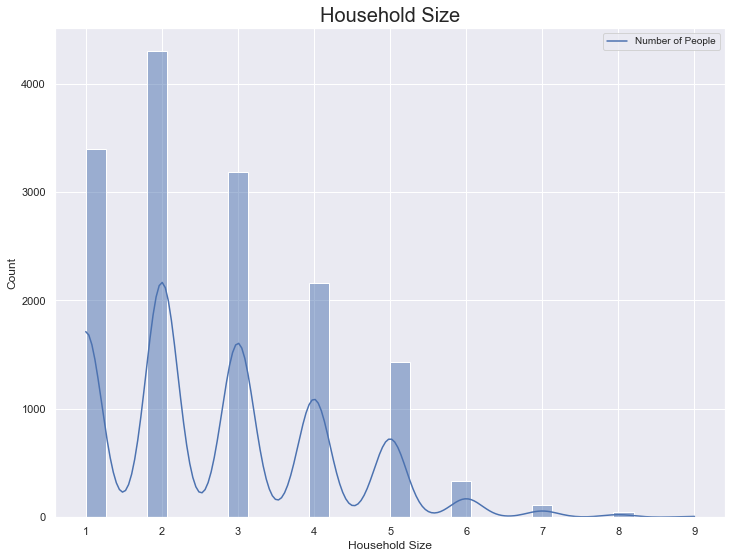

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.histplot(df1['IBE8629'], kde=True, bins= 30)
p.set_xlabel('Household Size')
p.set_title('Household Size', fontsize= 20)
plt.legend(['Number of People'], fontsize= 10)

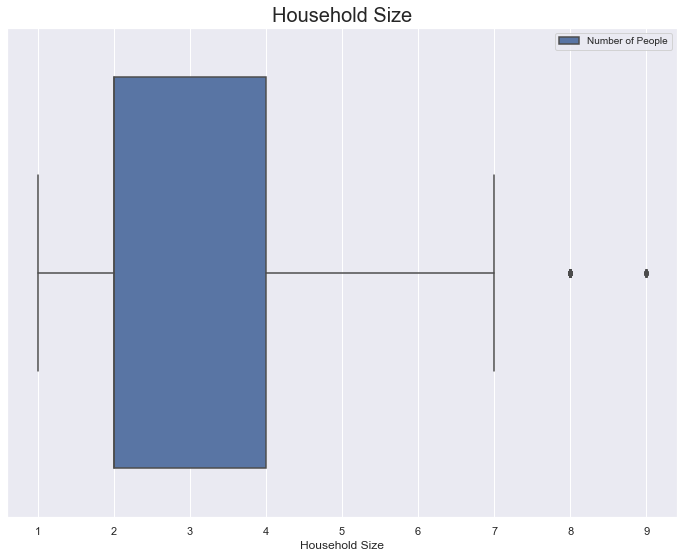

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.boxplot(x= df1['IBE8629'],  data=df1)
p.set_xlabel('Household Size')
p.set_title('Household Size', fontsize= 20)
plt.legend(['Number of People'], fontsize= 10)

As we can see, there are some outliers on Household Size. Since this is not normal distributed data (right skewed), we will use IQR method to remove outliers.

In [22]:
def find_outliers(data):
    
    QR1=data.quantile(0.25)
    QR3=data.quantile(0.75)

    IQR=QR3-QR1
    
    outliers = data[(data > (QR3 + (1.5 * IQR))) | (data < (QR1 - (1.5 * IQR)))]
    
    print(f'Number of Outliers: {int(len(outliers))}')
    print(f'Max Outlier Value: {int(max(outliers))}')
    print(f'Min Outliers Value: {int(min(outliers))}')
    return outliers

In [23]:
#A method to remove outliers
def set_outlier_limits(data):
    
    upper_limit = int(data.mean() + (3 * data.std()))
    lower_limit = int(data.mean() - (3 * data.std()))
    
    data = np.where(data > upper_limit,upper_limit, data)
    data = np.where(data < lower_limit, lower_limit, data)
    data = pd.Series(data)
    return data

In [24]:
df1['IBE8629'] = set_outlier_limits(df1['IBE8629'])


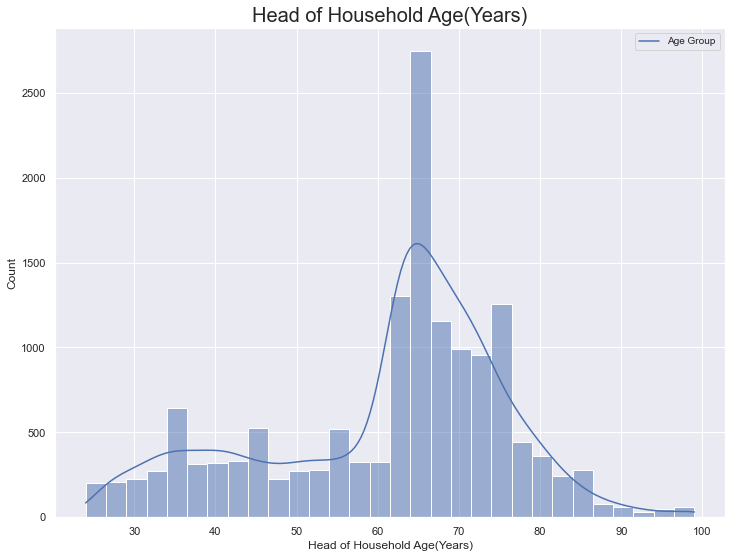

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.histplot(df1['IBE8616'], kde= True, bins= 30)
p.set_xlabel('Head of Household Age(Years)')
p.set_title('Head of Household Age(Years)', fontsize= 20)
plt.legend(['Age Group'], fontsize= 10)

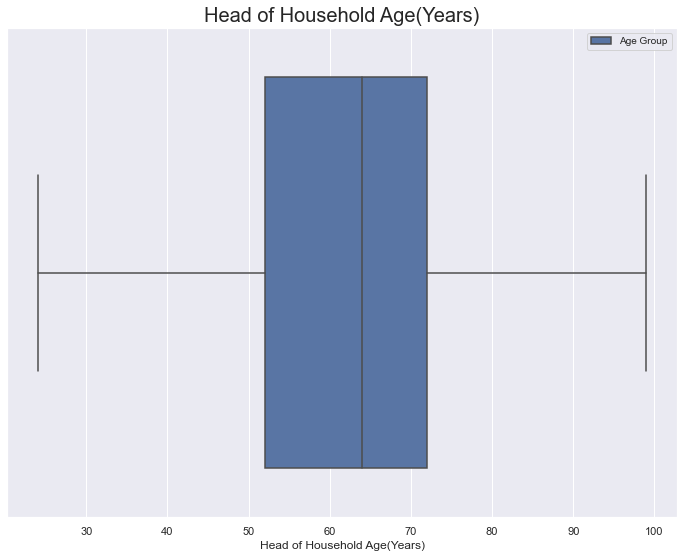

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.boxplot(x= df1['IBE8616'], data=df1)
p.set_xlabel('Head of Household Age(Years)')
p.set_title('Head of Household Age(Years)', fontsize= 20)
plt.legend(['Age Group'], fontsize= 10)

It seem that the Head of Household Age feature normal distrubutes and has no outliers.

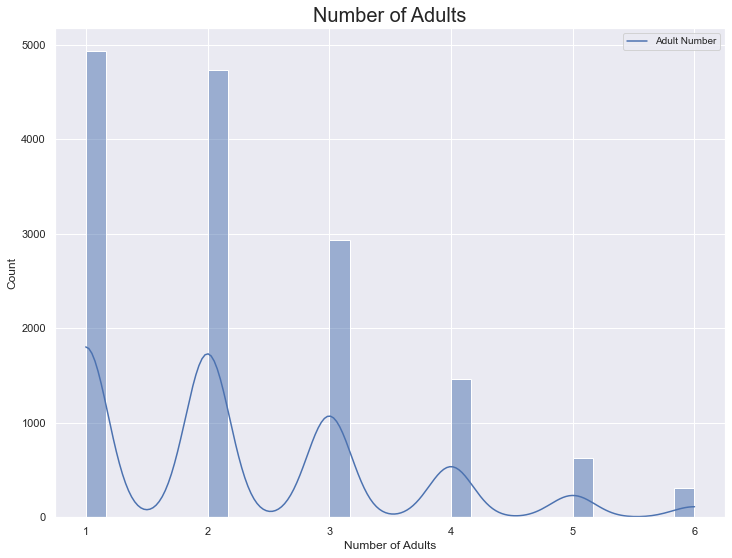

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.histplot(df1['IBE8628'], kde=True, bins= 30)
p.set_xlabel('Number of Adults')
p.set_title('Number of Adults', fontsize= 20)
plt.legend(['Adult Number'], fontsize= 10)

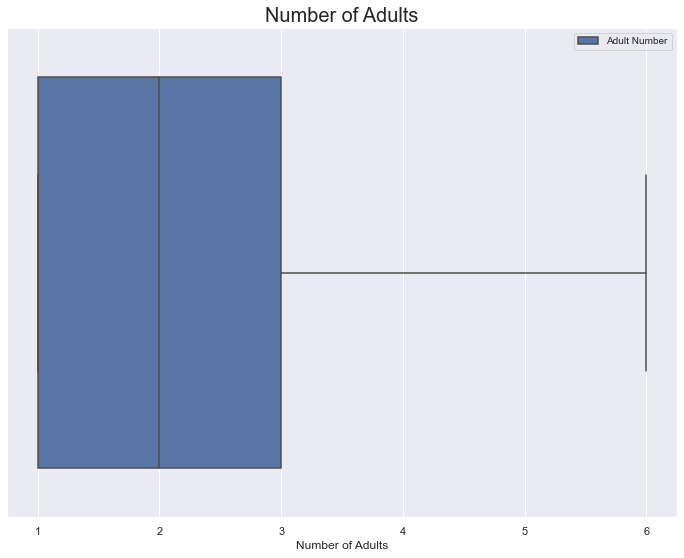

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.boxplot(x= df1['IBE8628'], data=df1)
p.set_xlabel('Number of Adults')
p.set_title('Number of Adults', fontsize= 20)
plt.legend(['Adult Number'], fontsize= 10)

No outliers here either. We will check one more numerical feature for outliers.

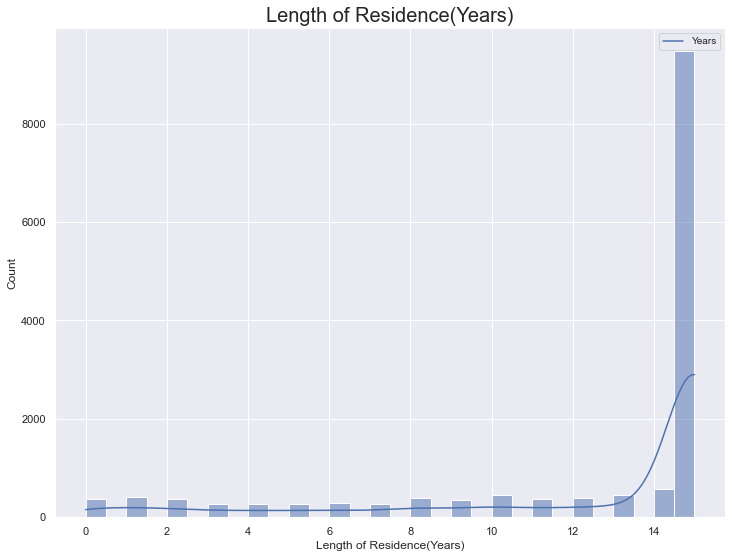

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.histplot(df1['IBE7607_01'], kde=True, bins= 30)
p.set_xlabel('Length of Residence(Years)')
p.set_title('Length of Residence(Years)', fontsize= 20)
plt.legend(['Years'], fontsize= 10)

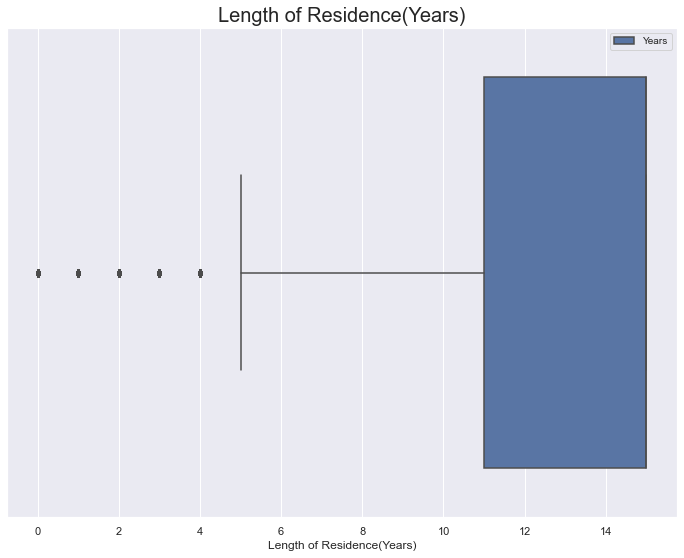

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.boxplot(x=df1['IBE7607_01'], data=df1)
p.set_xlabel('Length of Residence(Years)')
p.set_title('Length of Residence(Years)', fontsize= 20)
plt.legend(['Years'], fontsize= 10)

Length of Residence is left skewed and has outliers, so we will use our method to remove them.

In [31]:
find_outliers(df1['IBE7607_01'])

Number of Outliers: 1709
Max Outlier Value: 4
Min Outliers Value: 0


2        0
11       4
24       2
35       1
60       3
        ..
14951    4
14956    4
14969    4
14977    0
14988    2
Name: IBE7607_01, Length: 1709, dtype: int64

In [32]:
set_outlier_limits(df1['IBE7607_01'])
(df1['IBE7607_01']) = set_outlier_limits(df1['IBE7607_01'])

# DATA VISUALIZATION

We will create some plots to see the correlation between the features and the target, and we will answer some questions that will help exploring the data and make meaningful predictions later on. For this project, we will chose 3 features that is most corrolated feature with the target.


In [33]:
feature_corr = df1.drop("Response_Flag", axis=1).apply(lambda x: x.corr(df1.Response_Flag)).sort_values(ascending = False)
feature_corr

State FIPS     0.048845
IBE8616        0.032977
AP011282       0.029192
IBE7821        0.015256
IBE8647        0.015019
IBE8604        0.014270
IBE8606        0.010762
IBE8581        0.010258
County FIPS    0.008712
IBE7724        0.007158
IBE8165_01     0.006141
IBE7607_01     0.005371
IBE7726        0.003462
IBE7849        0.002648
IBE8609        0.001677
IBE9509        0.000991
IBE6200        0.000955
IBE9153_04    -0.000820
IBE7832       -0.002471
IBE2022       -0.002559
IBE7779       -0.003691
IBE7827       -0.003999
IBE7602_01    -0.004071
IBE7763       -0.004688
IBE9153_08    -0.005671
IBE7824       -0.006305
IBE7720       -0.006350
IBE7823       -0.007193
IBE7753       -0.008328
IBE7756       -0.008773
IBE7822       -0.009777
IBE9153_05    -0.010381
IBE8652       -0.010672
IBE9153_07    -0.010799
IBE8439       -0.011798
IBE9153_14    -0.012676
IBE7777       -0.013385
IBE7848       -0.015264
IBE9153_15    -0.018233
IBE7851       -0.020418
IBE8441       -0.020811
IBE7740       -0

States (States FIPS), Age of Head of Household (IBE8616) and Market Segment (AP011282) are the most correlated features with our target, therefore we will focus on those.

First, let's check the states and counties where people responded.

In [34]:
responded_states = df1.loc[df1['Response_Flag'] == 1]["State FIPS"]

In [35]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}


for i,x in state_codes.items():
    state_codes[i] = int(x)


In [36]:
for i in responded_states.values:
    for k,v in state_codes.items():
        if i == v:
            responded_states= responded_states.replace(i,k)

Text(0.5, 1.0, 'States Where People Responded')

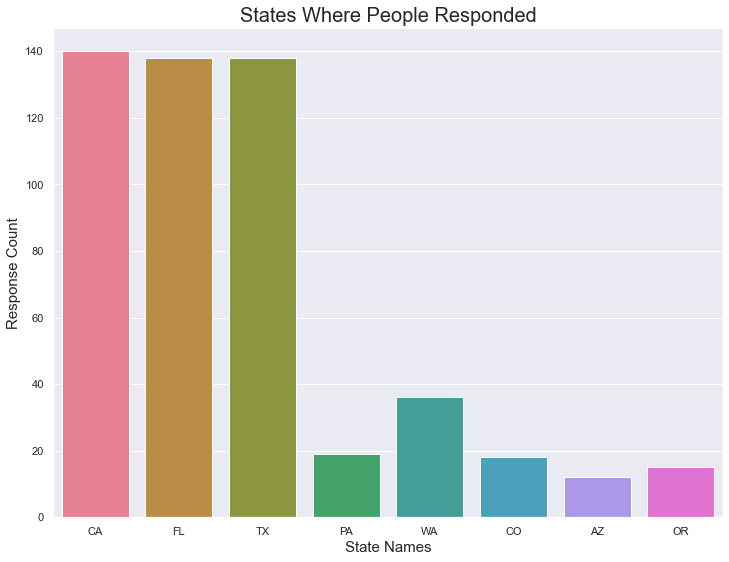

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.barplot(x=responded_states, y="Response_Flag", data=df1, estimator=sum, palette="husl")
p.set_ylabel('Response Count', fontsize= 15)
p.set_xlabel('State Names', fontsize= 15)
p.set_title('States Where People Responded', fontsize= 20)



As we can see California, Florida and Texas are the states where people responded most.

Now we will plot the age of Household people who responded the direct mail. 

In [38]:
responded_age = df1.loc[df1['Response_Flag'] == 1]["IBE8616"]

Text(0.5, 1.0, 'Age of Head of Household Who Responded')

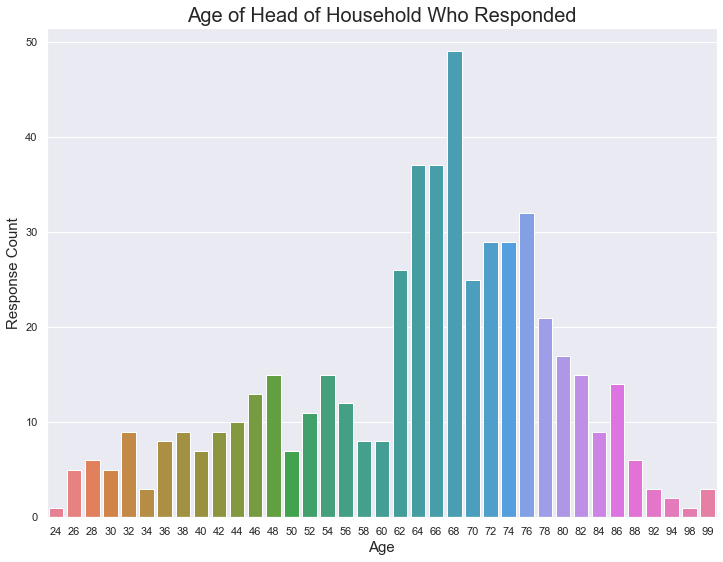

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
p = sns.barplot(x=responded_age, y="Response_Flag", data=df1, estimator=sum, palette="husl")
p.set_ylabel('Response Count', fontsize= 15)
p.set_xlabel('Age', fontsize= 15)
p.set_title('Age of Head of Household Who Responded', fontsize= 20)


We can see that 68 years are the ones that responded most,66 and 62 follows.


Last, we will plot Market Segment that responded to our direct mail.

In [40]:
responded_market = df1.loc[df1['Response_Flag'] == 1]["AP011282"]

Text(0.5, 1.0, 'Market Segment Responded')

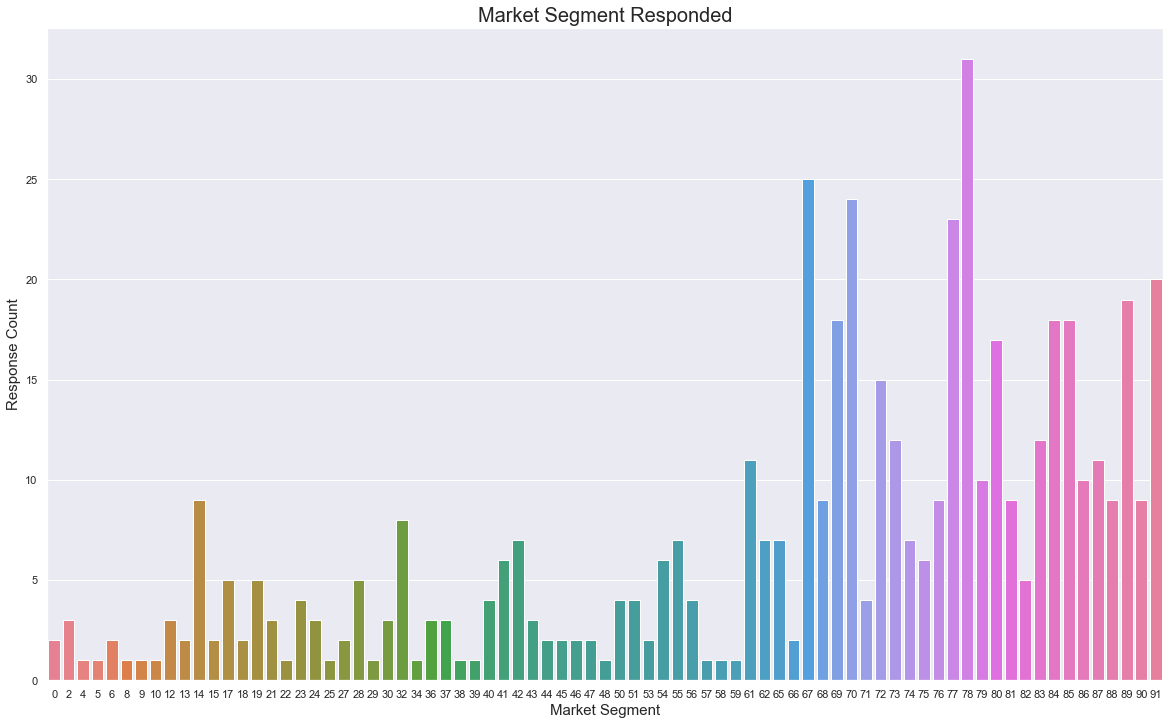

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,12)})
p = sns.barplot(x=responded_market, y="Response_Flag", data=df1, estimator=sum, palette="husl")
p.set_ylabel('Response Count', fontsize= 15)
p.set_xlabel('Market Segment', fontsize= 15)
p.set_title('Market Segment Responded', fontsize= 20)


Most Responded Segments are Touring Time (79), Tasteful Country (67) and Consulting Choices (70).

__Suggestion__ We can use different charts and blots to visualize more feature for the client.

# Model Building

Now, we will start building our model to predict whether the consumer will respond or not by the features we worked on so far. Since the question that we are looking to answer has only two categories (response/no response), we can use binary algorithms such Logistics regression, Random Forest and XGBoost Classification.

__Defining Features and Target Value__

Before jumping the regression models, we need to define our target value and features. Our features will __X__ and our target value will be __y__ as per below:

<p>X = All features  except Response_Flag column  (predictors)<p/>

<p> y = Response_Flag column (target value)

In [42]:
X = df1.drop(['Response_Flag'], axis=1)
X.head(5)

,County FIPS,State FIPS,IBE8609,IBE8652,IBE8629,IBE8628,IBE8619,IBE7602_01,IBE8671,IBE8616,IBE9509,IBE8604,IBE7832,IBE7827,IBE7823,IBE7822,IBE7824,IBE7726,IBE7724,IBE7821,IBE7848,IBE7779,IBE7777,IBE7740,IBE7849,IBE7720,IBE7753,IBE7851,IBE7763,IBE7775,IBE7756,IBE2022,AP011282,IBE6200,IBE9153_04,IBE9153_05,IBE9153_07,IBE9153_08,IBE9153_13,IBE9153_14,IBE9153_15,IBE9153_16,IBE8647,IBE8165_01,IBE8581,IBE8439,IBE8441,IBE8642,IBE8606,IBE7607_01,IBE8663
0,73,6,4,2,2,1,0,1,9,62,1,26,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,4,2,5,10,1,9,6
1,37,6,4,3,5,4,1,1,11,34,1,26,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,11,0,1,1,1,1,0,0,1,1,1,0,1,2,6,17,1,15,6
2,37,6,4,1,2,1,0,0,1,72,1,26,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,85,0,1,1,1,0,1,1,0,1,1,0,1,2,6,13,1,0,6
3,65,6,4,2,3,2,0,1,3,70,2,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,74,0,0,0,0,0,0,0,0,0,0,0,1,2,7,17,1,14,6
4,47,6,4,3,2,4,1,1,8,32,1,23,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,67,0,0,1,0,0,0,0,0,1,1,0,1,2,3,13,1,15,6


In [43]:
y = df1['Response_Flag'].copy()
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Response_Flag, dtype: int64

__Suggestion__ We can standardize numerical features for improved models.

In [44]:
y.value_counts()

0    14478
1      516
Name: Response_Flag, dtype: int64

As we can see, there is only 516 responded and 14478 not responded in our dataset. Two classes are not represented equally. This is a great example of __Class Imbalance__ which is classification problem usually occurs in cases like credit card transactions or the results of online campaigns. We can use oversampling by applying SMOTE method.  

__Suggestion__ We can standardize numerical features for improved models.

In [45]:

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [46]:
y.value_counts()

0    14478
1    14478
Name: Response_Flag, dtype: int64

Now, as we can see above both class is represented equally.

We set up our datasets, now we will split our sets into training data and test data. The reason behind is that we would like to build a strong model that predicts well. By splitting our our data into test and training data, we can use cross_validation on our model later.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2022)

We will start with Logistics Regression and check accuracy and move on to the other algorithms. 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
logg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit the model on the trainng data.
logg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('The accuary score for our model is: {0:.2f}'.format(
    accuracy_score(logg.predict(X_test), y_test)))

The accuary score for our model is: 0.79


__Suggestion__ Our model predicts the with 79% whether the person will default next payment or not. We will check the feature importance by retrieving the coefficients for each input variable to see which features have more impact on prediction model and how we can tune them to get better accuracy result.

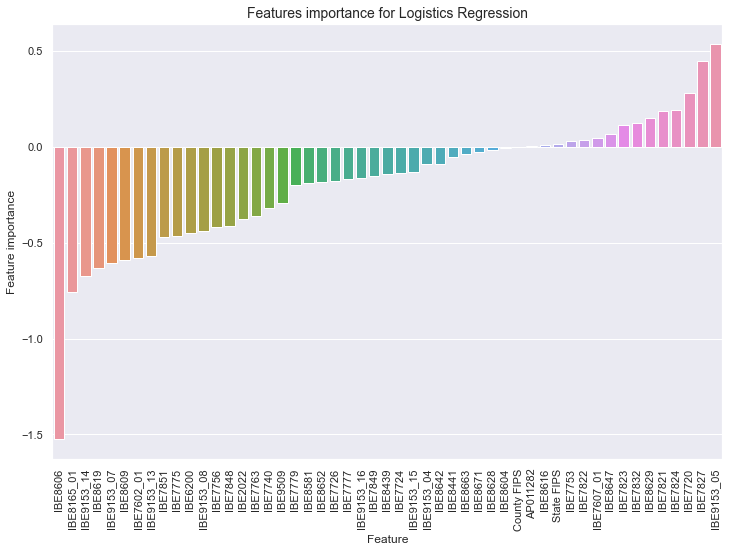

In [49]:
# get importance
importance = logg.coef_[0]

# summarize feature importance
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance':importance})
tmp = tmp.sort_values(by='Feature importance')
plt.figure(figsize = (12,8))
plt.title('Features importance for Logistics Regression',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

__Suggestion__ We can use Variance Inflation Factor (VIF) for removing features. VIF detects Colinearity (or Multicolinearity) which variables are very correlated with each other and carry similar information in the dataset. We can check VIF as below:

Now, we will try other algorithms and check their accury with F1 score. We are using F1 score because it sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.

In [50]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()

def scorer(a,b,c):
    for model in (a,b,c):
        model.fit(X_train,y_train)
        print (model.__class__.__name__, 'F1 score =', f1_score(y_test,model.predict(X_test)))
scorer (logg,rfc,xgb)

LogisticRegression F1 score = 0.797683923705722
RandomForestClassifier F1 score = 0.9704019348151559
XGBClassifier F1 score = 0.9664183381088824


Our best score is 0.97 with Randomforest, we will check the important features and print full classification report.

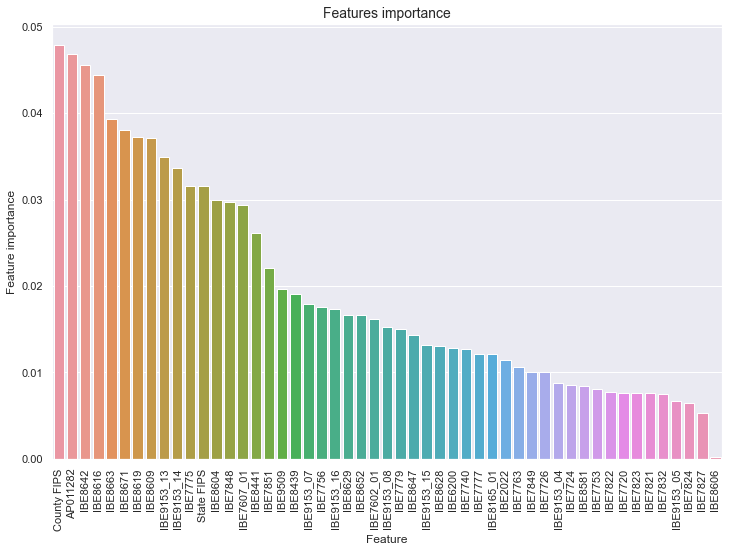

In [52]:
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are County, Market Segment, Estimated Market Value.

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def run_regression_accuracy(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(
        model.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n', cm)

    print('\nClassification report: \n', classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(
        y_test, model.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    

Accuracy of Random Forest classifier on test set: 0.97

Confusion matrix: 
 [[4231  128]
 [ 119 4209]]

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4359
           1       0.97      0.97      0.97      4328

    accuracy                           0.97      8687
   macro avg       0.97      0.97      0.97      8687
weighted avg       0.97      0.97      0.97      8687



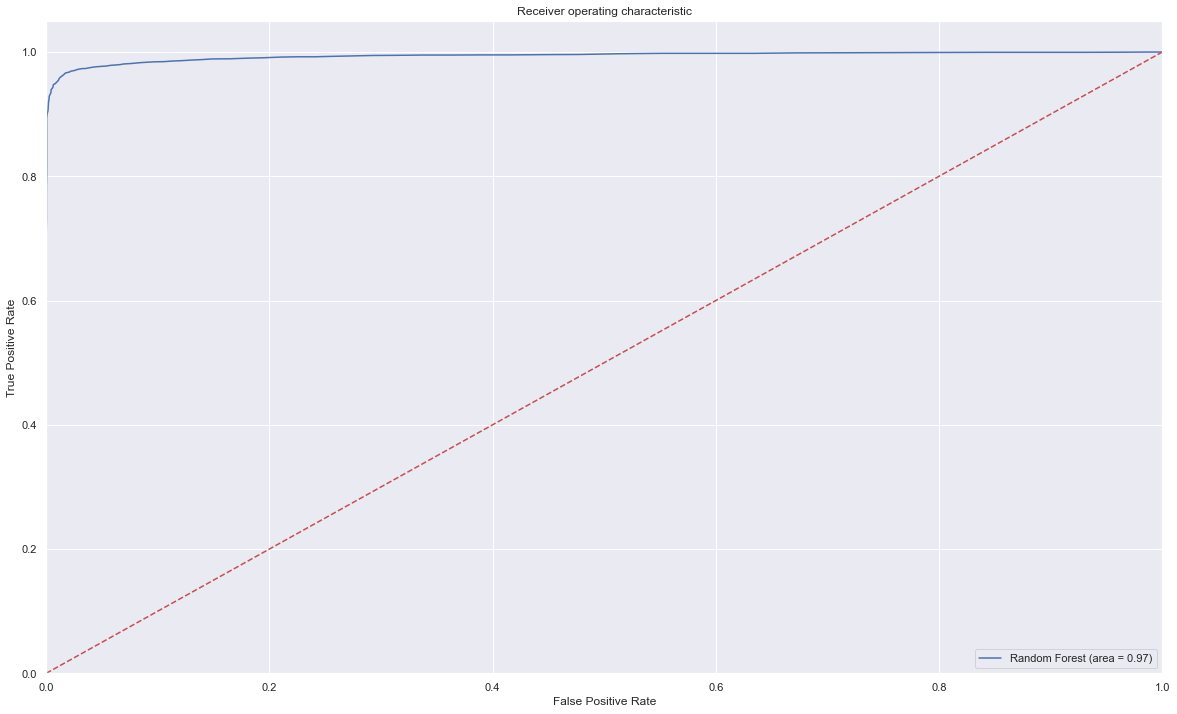

In [54]:
run_regression_accuracy(X_train, y_train, X_test, y_test, rfc)

In [55]:
 roc_auc_score(y_test, rfc.predict(X_test))

0.9715700439611419

## CASE STUDY QUESTION

#### Problem

<p>Design a direct mail contact strategy that optimizes the client’s budget.<p/>
<p>1) How many times are you going to mail?<p/>
<p>2) When are you going to mail?<p/>
<p>3) How many pieces are you going to mail?<p/>
<p>4) Who are you going to mail?<p/>
<p>5) What are your estimated results (Number Mailed, Number of Enrollments, Etc.)<p/>
<p>6) What additional information would have been helpful and how would you have used it?<p/>

1) 4 times 


2)<p>10/12/21 0.10 = 137,155,<p/>
<p>10/26/21 0.15 = 205,733<p/>
<p>11/9/21  0.25 = 342,889<p/>
<p>11/23/21 0.50 = 685,779<p/>

3) 842,000 / 0.6139 = 1,371,558.89 total

4) Out of 1,119,903 individuals, people are between age 64 to 80.

5) 1,371,558.89 Mailed, with 0.313% response rate = 4292.979

6) More info about decile table